# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats as st
from bioinfokit.analys import stat
import matplotlib.pyplot as plt

# Load Data


In [2]:
subjects = [100610, 102311, 102816, 104416, 105923,
            108323, 109123, 111514, 114823, 115017,
            115825, 116726, 118225, 125525, 126426,
            128935, 130114, 130518, 131217, 131722,
            132118, 134627, 134829, 135124, 137128,
            140117, 144226, 145834, 146129, 146432,
            146735, 146937, 148133, 150423, 155938,
            156334, 157336, 158035, 158136, 159239,
            162935, 164131, 164636, 165436, 167036,
            167440, 169040, 169343, 169444, 169747]
mse_sub = []
for sub in subjects:
    loc = "ae_MSE/" + str(sub) + '_regional_MSE_2.csv'
    df = pd.read_csv(loc,index_col=0)
    mse_sub.append(df)    
print('There are ' + str(len(mse_sub)) + ' subjects.')
print('For each subject, there are ' + str(mse_sub[0].shape[0]) + ' sessions.')
print('For each session, there are ' + str(mse_sub[0].shape[1]) + ' regional MSE.')

There are 50 subjects.
For each subject, there are 14 sessions.
For each session, there are 379 regional MSE.


In [3]:
mse_sub[0].head(5)

,L_V1,L_MST,L_V6,L_V2,L_V3,L_V4,L_V8,L_4,L_3b,L_FEF,...,diencephalon_right,hippocampus_left,hippocampus_right,pallidum_left,pallidum_right,putamen_left,putamen_right,thalamus_left,thalamus_right,brainStem
movie1,0.331925,0.303235,0.504088,0.134815,0.108276,0.176851,0.624035,0.165220,0.377096,1.092119,...,0.128131,0.115918,0.145655,0.246552,0.226681,0.325796,0.399586,0.165533,0.169094,0.071030
movie2,0.239030,0.434067,0.364328,0.120894,0.147240,0.253314,0.573581,0.167927,0.239516,1.010726,...,0.115770,0.142471,0.102575,0.218617,0.183569,0.266729,0.270855,0.143222,0.202272,0.060319
movie3,0.246763,0.541083,0.618400,0.091157,0.107164,0.172301,0.573326,0.173120,0.356595,0.489977,...,0.156889,0.113319,0.189165,0.309475,0.284124,0.211357,0.269048,0.158161,0.163971,0.078785
movie4,0.242169,0.410084,0.367533,0.095629,0.199289,0.168793,0.848551,0.122534,0.313088,0.747733,...,0.187380,0.107221,0.135206,0.169709,0.287894,0.226207,0.273900,0.195523,0.217685,0.067768
rest1,0.232448,0.453695,0.393931,0.139537,0.143834,0.130141,0.478462,0.141677,0.339898,0.815644,...,0.129228,0.162041,0.156197,0.352617,0.215135,0.301915,0.339439,0.212501,0.193155,0.069188


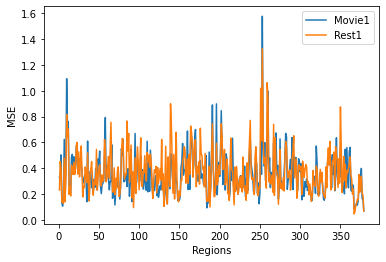

In [7]:
plt.plot(np.arange(1,380), mse_sub[0].iloc[0], label='Movie1')
plt.plot(np.arange(1,380), mse_sub[0].iloc[4], label='Rest1')
# plt.plot(np.arange(1,380), mse_sub[0].iloc[8], label='Retbar1')
plt.xlabel("Regions")
plt.ylabel('MSE')
plt.legend()
plt.savefig("100610.jpg")

# Whole brain t-test


In [5]:
# calculate the whole brain mean MSE for each subject
mean_mse = []

for sub in mse_sub:
    sub.mean(axis=1)
    sub['AVG'] = sub.mean(axis=1)

In [6]:
mse_sub[0]

,L_V1,L_MST,L_V6,L_V2,L_V3,L_V4,L_V8,L_4,L_3b,L_FEF,...,hippocampus_left,hippocampus_right,pallidum_left,pallidum_right,putamen_left,putamen_right,thalamus_left,thalamus_right,brainStem,AVG
movie1,0.331925,0.303235,0.504088,0.134815,0.108276,0.176851,0.624035,0.165220,0.377096,1.092119,...,0.115918,0.145655,0.246552,0.226681,0.325796,0.399586,0.165533,0.169094,0.071030,0.353489
movie2,0.239030,0.434067,0.364328,0.120894,0.147240,0.253314,0.573581,0.167927,0.239516,1.010726,...,0.142471,0.102575,0.218617,0.183569,0.266729,0.270855,0.143222,0.202272,0.060319,0.358716
movie3,0.246763,0.541083,0.618400,0.091157,0.107164,0.172301,0.573326,0.173120,0.356595,0.489977,...,0.113319,0.189165,0.309475,0.284124,0.211357,0.269048,0.158161,0.163971,0.078785,0.366294
movie4,0.242169,0.410084,0.367533,0.095629,0.199289,0.168793,0.848551,0.122534,0.313088,0.747733,...,0.107221,0.135206,0.169709,0.287894,0.226207,0.273900,0.195523,0.217685,0.067768,0.343372
rest1,0.232448,0.453695,0.393931,0.139537,0.143834,0.130141,0.478462,0.141677,0.339898,0.815644,...,0.162041,0.156197,0.352617,0.215135,0.301915,0.339439,0.212501,0.193155,0.069188,0.374727
rest2,0.277942,0.461584,0.327560,0.113895,0.122642,0.152139,0.542107,0.232130,0.377266,0.631004,...,0.109718,0.142186,0.311088,0.217473,0.332070,0.442501,0.243759,0.215601,0.055468,0.351269
rest3,0.213053,0.671421,0.252871,0.110605,0.175383,0.237731,0.700548,0.169860,0.367362,0.679404,...,0.138826,0.133811,0.264988,0.196810,0.257318,0.264840,0.196803,0.126856,0.060537,0.379864
rest4,0.316324,0.524729,0.236711,0.141448,0.145151,0.230711,0.615231,0.164954,0.358545,0.762241,...,0.115427,0.124342,0.300684,0.300721,0.266184,0.344706,0.189714,0.158170,0.087543,0.387907
retbar1,0.373485,0.645782,0.527373,0.170864,0.301889,0.337355,0.743064,0.116046,0.350194,1.080298,...,0.145123,0.151070,0.253197,0.257393,0.262322,0.369469,0.162908,0.153015,0.066717,0.341933
retbar2,0.262636,0.586444,0.423806,0.141629,0.317076,0.304016,1.034242,0.107676,0.264604,0.533833,...,0.150354,0.188144,0.199911,0.221441,0.191748,0.240882,0.164909,0.185263,0.055525,0.337610


In [7]:
# get 50 * MSE values for movie1 session
mse_movie1 = []
for sub in mse_sub:
    mse_movie1.append(sub.loc['movie1', 'AVG'])
print(len(mse_movie1))

mse_retbar1 = []
for sub in mse_sub:
    mse_retbar1.append(sub.loc['retbar1', 'AVG'])
print(len(mse_retbar1))

# get 50 * MSE values for rest1 session
mse_rest1 = []
for sub in mse_sub:
    mse_rest1.append(sub.loc['rest1', 'AVG'])
print(len(mse_rest1))

# get 200 * MSE values for rest sessions
mse_rest_all = []
for sub in mse_sub:
    mse_rest_all.append(sub.loc['rest1', 'AVG'])
    mse_rest_all.append(sub.loc['rest2', 'AVG'])
    mse_rest_all.append(sub.loc['rest3', 'AVG'])
    mse_rest_all.append(sub.loc['rest4', 'AVG'])
print(len(mse_rest_all))

# get 200 * MSE values for movie sessions
mse_movie_all = []
for sub in mse_sub:
    mse_movie_all.append(sub.loc['movie1', 'AVG'])
    mse_movie_all.append(sub.loc['movie2', 'AVG'])
    mse_movie_all.append(sub.loc['movie3', 'AVG'])
    mse_movie_all.append(sub.loc['movie4', 'AVG'])
print(len(mse_movie_all))

# get 300 * MSE values for movie sessions
mse_task_all = []
for sub in mse_sub:
    mse_task_all.append(sub.loc['retbar1', 'AVG'])
    mse_task_all.append(sub.loc['retbar2', 'AVG'])
    mse_task_all.append(sub.loc['retccw', 'AVG'])
    mse_task_all.append(sub.loc['retcon', 'AVG'])
    mse_task_all.append(sub.loc['retcw', 'AVG'])
    mse_task_all.append(sub.loc['retexp', 'AVG'])
print(len(mse_task_all))

50
50
50
200
200
300


### T-test

Movie vs. Rest

In [8]:
# Paired t-test for 50(movie1):50(rest1)
t_stat_1, p_1 = st.ttest_rel(a=mse_movie1, b=mse_rest1)
print('2 sample t-test for 50(movie1):50(rest1)')
print('t-statsitic = ' + str(t_stat_1))
print('p-value = ' + str(p_1))

2 sample t-test for 50(movie1):50(rest1)
t-statsitic = -4.459685379567045
p-value = 4.792790111625861e-05


In [9]:
# 2 sample t-test for 50(movie1):200(rest_all)
t_stat_2, p_2 = st.ttest_ind(a=mse_movie1, b=mse_rest_all)
print('2 sample t-test for 50(movie1):200(rest_all)')
print('t-statsitic = ' + str(t_stat_2))
print('p-value = ' + str(p_2))
# df_list_2 = []
# for n in mse_movie1:
#     df_list_2.append(['movie1', n])
# for n in mse_rest_all:
#     df_list_2.append(['rest', n])
# df_2 = pd.DataFrame(df_list_2, columns=['type', 'MSE'])

# te = stat()
# te.ttest(df=df_2, xfac="type", res="MSE", test_type=2)
# print(te.summary)

2 sample t-test for 50(movie1):200(rest_all)
t-statsitic = -1.6181988066613366
p-value = 0.1068908417556747


In [10]:
# Paired t-test for 200(movie_all):200(rest_all)
t_stat_2, p_2 = st.ttest_rel(a=mse_movie_all, b=mse_rest_all)
print('2 sample t-test for 200(movie_all):200(rest_all)')
print('t-statsitic = ' + str(t_stat_2))
print('p-value = ' + str(p_2))

2 sample t-test for 200(movie_all):200(rest_all)
t-statsitic = -1.5285807931935753
p-value = 0.12795634598320038


Task vs Rest

In [11]:
# Paired t-test for 50(retbar1):50(rest1)
t_stat_3, p_3 = st.ttest_rel(a=mse_retbar1, b=mse_rest1)
print('2 sample t-test for 50(retbar1):50(rest1)')
print('t-statsitic = ' + str(t_stat_3))
print('p-value = ' + str(p_3))

2 sample t-test for 50(retbar1):50(rest1)
t-statsitic = 3.3865842029372906
p-value = 0.001402575085996513


In [12]:
# 2 sample t-test for 50(retbar1):200(rest_all)
t_stat_4, p_4 = st.ttest_ind(a=mse_retbar1, b=mse_rest_all, equal_var=False)
print('2 sample t-test for 50(retbar1):200(rest_all)')
print('t-statsitic = ' + str(t_stat_4))
print('p-value = ' + str(p_4))
# 2 sample t-test for 50(retbar1):200(rest_all)
df_list_4 = []
for n in mse_retbar1:
    df_list_4.append(['retbar1', n])
for n in mse_rest_all:
    df_list_4.append(['rest', n])
df_4 = pd.DataFrame(df_list_4, columns=['type', 'MSE'])

te = stat()
te.ttest(df=df_4, xfac="type", res="MSE", test_type=2, evar=False)
print(te.summary)

2 sample t-test for 50(retbar1):200(rest_all)
t-statsitic = 3.1380422495568983
p-value = 0.0026554113539251725

Two sample t-test with unequal variance (Welch's t-test)

------------------  -----------
Mean diff           -0.0256786
t                   -3.13804
Std Error            0.00818299
df                  58.9428
P-value (one-tail)   0.00132771
P-value (two-tail)   0.00265541
Lower 95.0%         -0.042053
Upper 95.0%         -0.00930411
------------------  -----------

Parameter estimates

Level      Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
rest          200  0.363101  0.0345848   0.00244552       0.358279       0.367923
retbar1        50  0.38878   0.0552181   0.00780902       0.373087       0.404472



In [13]:
# 2 sample t-test for 300(task_all):200(rest_all)
t_stat_3, p_3 = st.ttest_ind(a=mse_task_all, b=mse_rest_all)
print('2 sample t-test for 300(task_all):200(rest_all)')
print('t-statsitic = ' + str(t_stat_3))
print('p-value = ' + str(p_3))

2 sample t-test for 300(task_all):200(rest_all)
t-statsitic = 9.159604961473438
p-value = 1.354603500750704e-18
